In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt

import madnet as mn
import madnet.nn as nn

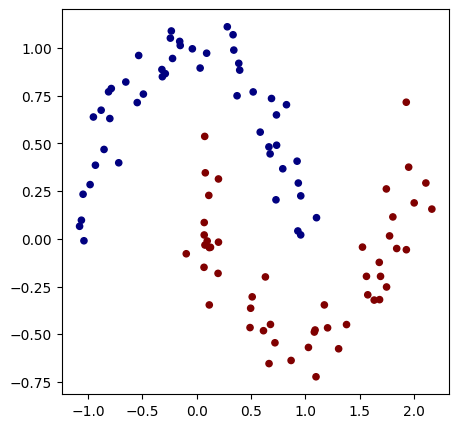

In [2]:
X, targets = make_moons(n_samples=100, noise=0.1)
targets = np.expand_dims(targets, axis=-1)
X, targets = mn.Tensor(X), mn.Tensor(targets)
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=targets.data, s=20, cmap='jet')

In [3]:
X.shape, targets.shape

((100, 2), (100, 1))

In [4]:
model = nn.Sequential([
    nn.Linear(2, 20),
    nn.ReLU(),
    nn.Linear(20, 50), 
    nn.ReLU(),
    nn.Linear(50, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
    nn.Sigmoid()
])

In [5]:
def accuracy(x, y):
    x = np.array([[1 if pred > 0.5 else 0 for pred in x]])
    y = y.reshape(x.shape)
    return np.sum(x == y) / 100

In [6]:
losses, accs = [], []
lr = 0.5
loss_fn = nn.MSELoss()

for i in range(100):
    preds = model(X)
    loss = loss_fn(preds, targets)
    acc = accuracy(preds, targets)
    if i % 10 == 0:
        print(f'Epoch: {i+1}\tLoss: {loss.data[0][0]:.4f}\tAccuracy: {100 * acc:.2f}%')
    loss.backward()
    # run SGD
    for param in model.parameters():
        param.data = param.data - lr * param.grad
    model.zero_grad()

    # track model performance
    losses.append(loss.data[0][0])
    accs.append(acc)

Epoch: 1	Loss: 0.6529	Accuracy: 30.00%
Epoch: 11	Loss: 0.2377	Accuracy: 76.00%
Epoch: 21	Loss: 0.1235	Accuracy: 87.00%
Epoch: 31	Loss: 0.0879	Accuracy: 91.00%
Epoch: 41	Loss: 0.0749	Accuracy: 92.00%
Epoch: 51	Loss: 0.0668	Accuracy: 93.00%
Epoch: 61	Loss: 0.0597	Accuracy: 94.00%
Epoch: 71	Loss: 0.0404	Accuracy: 96.00%
Epoch: 81	Loss: 0.0402	Accuracy: 96.00%
Epoch: 91	Loss: 0.0401	Accuracy: 96.00%


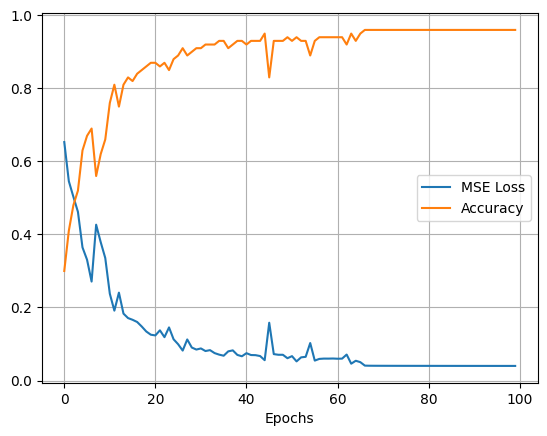

In [7]:
plt.plot(losses, label='MSE Loss')
plt.plot(accs, label='Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()